# Practical: Plotting and Visualization of Global Surface Temperature Data

## Introduction
In this practical, we will use the monthly average of the Earth’s surface temperature data from Jan 1850 to Dec 2023. We will explore various plotting techniques using Pandas and Matplotlib to analyze the data and extract meaningful insights.

## Objectives
- Plot the entire temperature record with meaningful labels and correct units.
- Visualize the seasonal cycle by plotting the last 5 years of the record.
- Create a bar chart showing average temperatures from three different 20-year periods.
- Calculate and plot the average temperature for each year.

## Prerequisites
- Knowledge of Python: functions, variables, lists, conditionals, loops, arrays.
- Basic understanding of Pandas and Matplotlib.

**Estimated Time: 1.5 hours**

## Background:
This dataset is the monthly average of the Earth’s surface (land and ocean/sea ice) temperature from Jan 1850 to Dec 2023 produced by Berkeley Earth. This record charts Earth’s unprecedented warming over the past century and is used extensively in international governmental reports to shape climate policies and ground truth climate model output.

If you simply plot the time series, however, it will be challenging to discern the steady warming signal by eye. What you’ll notice is a record with a lot of wiggles, or what might be characterized as ‘noise’ when the signal of interest is Earth’s warming trend. Those persistent ups and downs in the signal are due to the asymmetry in the distribution of land between Earth’s two hemispheres, with the Northern hemisphere having more land cover than the Southern hemisphere. Given the same incoming solar radiation, the surface temperature of land will warm more than if that area is ocean. This asymmetry, in combination with the annual changes in incoming solar radiation due to the tilt of Earth’s axis (seasons!), means that the monthly average temperature of the Earth also changes over the year. This is called a seasonal cycle. The seasonal cycle of the global average surface temperature of the Earth follows the Northern Hemisphere, warmest in July and coldest in January. This seasonal cycle is a natural cycle for Earth’s climate due to Earth’s rotation around the sun, the tilt of Earth’s axis, and the distribution of land over the surface of the Earth. 

In climate science, there are lots of different natural cycles that imprint on observed quantities like the average global surface temperature or the average amount of carbon dioxide in the atmosphere. Scientists often quantify these natural cycles by calculating what are called climatologies. A climatology is simply an average of a natural cycle of a quantity taken over a period of time that is understood to be representative of that natural cycle. Sometimes that period is described as the baseline. To calculate the seasonal climatology for Earth’s monthly global average surface temperature, you would average all the January’s in the record to find the climatological January, and then average all the February’s in the record, and so on. The end result is a typical (average) year in global average surface temperature on Earth. The period of time to include in this calculation will depend on your scientific interests and questions.

While these natural cycles are interesting, researchers are most interested in the way the climate system deviates from this natural cycle. The deviations of a quantity from its average cycle (climatology) is called an anomaly. Anomalies are very interesting. They tell us how a particular data point compares to other data points which should be very similar to it because of the presence of natural cycles. It’s the way we know if this June is hot compared to all the other previous June’s in our records. This is how we quantify exactly how much our Earth has warmed in the past century.

## Step 1: Importing Required Libraries

### Task
Before we start, let's import Pandas and Matplotlib. These libraries are essential for data manipulation and visualization.

### Hints
- Use `import pandas as pd` to import Pandas.
- Use `import matplotlib.pyplot as plt` to import Matplotlib's plotting module.

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

## Step 2: Loading and Preparing the Data

### Task
Load the data into a Pandas DataFrame and display the first few rows to understand its structure.

### Hints
- Use `pd.read_csv` to load the dataset.
- Use `df.head()` to display the first few rows of the DataFrame.

In [7]:
df = pd.read_csv('GAST_BerkeleyEarth_1850-2023.csv')
df.head()

,Year,Month,Monthly Average,Monthly Anomaly Uncertainty
0,1850,1,11.440,0.404
1,1850,2,12.197,0.524
2,1850,3,12.666,0.449
3,1850,4,13.345,0.304
4,1850,5,14.288,0.249


## Step 3: Plotting the Entire Temperature Record

### Task
Plot the entire temperature record from 1850 to 2023.

### Hints
- Convert the 'Year' and 'Month' columns to a datetime object. 
    - `pd.to_datetime` may come in handy.
- Use `plt.plot` to create the plot.
- Label the axes and add a title.

<function matplotlib.pyplot.show(close=None, block=None)>

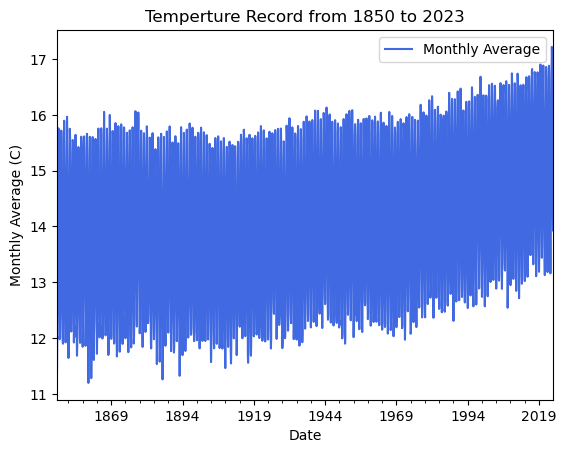

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df['Day'] = 1
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]) # There isnt day so we wou;d have to add day into the file 
df.head()

#create plot 
df.plot("Date", "Monthly Average", color="royalblue")
plt.title ("Temperture Record from 1850 to 2023")
plt.xlabel ("Date")
plt.ylabel("Monthly Average (C)")

#Show plot
plt.show

Text(0, 0.5, 'Monthly Average Temperture (C)')

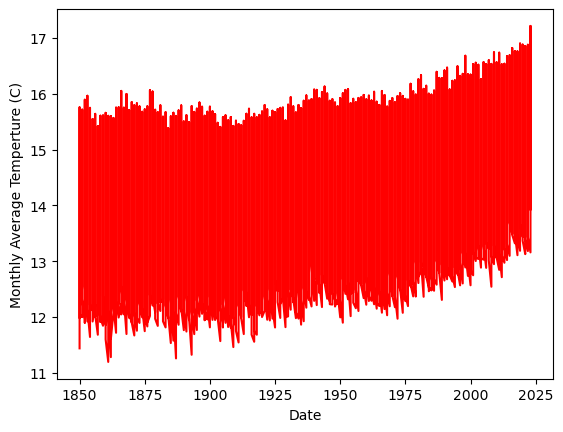

In [13]:
plt.plot(df['Year'], df['Monthly Average'], c='red')
plt.xlabel ("Date")
plt.ylabel ("Monthly Average Temperture (C)") 

## Step 4: Plotting the Last 5 Years to See the Seasonal Cycle

### Task
Filter the data for the last 5 years and plot the temperature record to observe the seasonal cycle.

### Hints
- Use boolean indexing to filter the DataFrame for the years 2018 to 2023.
- Plot the filtered DataFrame using `plt.plot`.


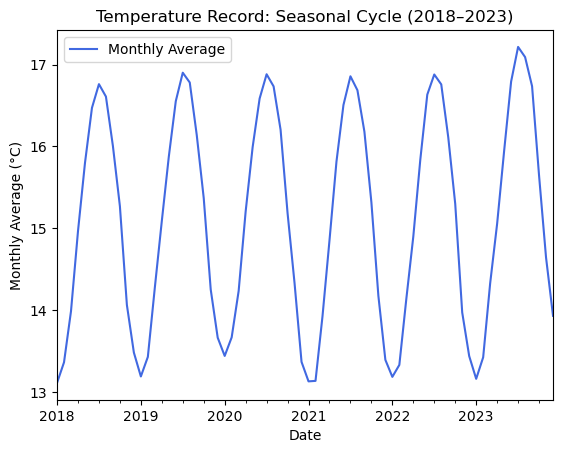

In [28]:
df_last5_years = df[(df['Year'] >= 2018) & (df['Year'] <= 2023)]

df_last5_years.plot("Date", "Monthly Average", color="royalblue")
plt.title("Temperature Record: Seasonal Cycle (2018–2023)")
plt.xlabel("Date")
plt.ylabel("Monthly Average (°C)")

# Show the plot
plt.show()

## Step 5: Creating a Bar Chart for Average Temperatures of Different 20-Year Periods

### Task
Calculate and plot the average temperature for three different 20-year periods.

### Hints
- Choose three 20-year periods (e.g., 1850-1869, 1950-1969, 2000-2019).
- Use boolean indexing to filter the DataFrame for each period.
- Use `df.mean()` to calculate the average temperature for each period.
- Use `plt.bar` to create the bar chart.

Text(0, 0.5, 'Average Temperature (°C)')

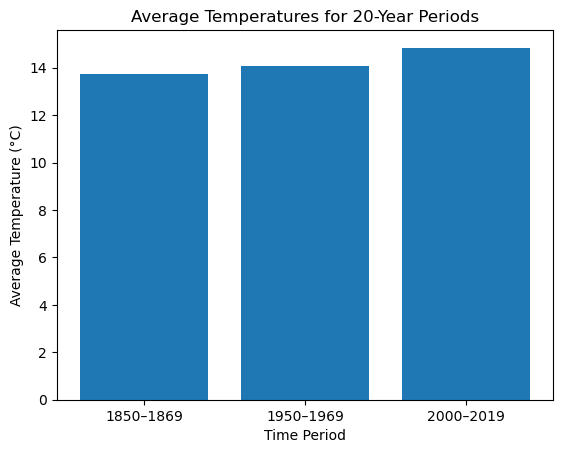

In [34]:
timeperiod1 = df[(df['Year'] >= 1850) & (df['Year'] <= 1869)]
timeperiod2 = df[(df['Year'] >= 1950) & (df['Year'] <= 1969)]
timeperiod3 = df[(df['Year'] >= 2000) & (df['Year'] <= 2019)]
# Calculating the average temperture for each time period from the data that was given
average1 = timeperiod1['Monthly Average'] .mean()
average2 = timeperiod2['Monthly Average'] .mean()
average3 = timeperiod3['Monthly Average'] .mean()
#Creating a bar Chart
plt.bar(['1850–1869', '1950–1969', '2000–2019'], [average1, average2, average3])
plt.title('Average Temperatures for 20-Year Periods')
plt.xlabel('Time Period')
plt.ylabel('Average Temperature (°C)')

## Step 6: Calculating and Plotting Yearly Average Temperature

### Task
Calculate the yearly average temperature and plot it.

### Hints
- Use `groupby` to group the data by year.
- Calculate the weighted average temperature for each year, considering the number of days in each month.
    - `df['Date'].dt.days_in_month` will return the number of days in each month
    - you might need to write a function to apply to your grouped data frame!
- Plot the yearly average temperatures using `plt.plot`.

In [ ]:
df['Date'].dt.days_in_month 
def weighted_avg:
    return (group['Monthly Average'] * gorup ['DaysInMonth']).sum() 


## Step 7: Calculating and Plotting Temperature Anomalies

### Task
Calculate the seasonal climatology for the period 1951-1980, and then remove it from the entire record to get anomalies. Plot the anomalies.

### Hints
- Filter the data for the baseline period (1951-1980).
- Use `groupby` to calculate the average temperature for each month.
- Subtract the monthly average (climatology) from the corresponding months in the entire record.
- Plot the anomalies using `plt.plot`.